In [1]:
import os
import sys

ROOT_DIR = os.path.abspath('..')
SRC_DIR = os.path.join(ROOT_DIR, 'src')
for path in (ROOT_DIR, SRC_DIR):
    if path not in sys.path:
        sys.path.append(path)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from config import DATA_PATHS

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
data_path = os.path.join('..', DATA_PATHS['sentiment_results'])
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Annotated dataset not found: {data_path}. Run the pipeline scripts first.")

df = pd.read_csv(data_path)
print(f"Loaded {len(df)} reviews from {data_path}.")
df.head()

Loaded 1761 reviews from ..\data/processed/reviews_with_sentiment.csv.


,review,rating,review_date,bank,source,bank_code,package,sentiment_label,sentiment_score,keywords
0,It is nice app,5,2025-11-26,Commercial Bank of Ethiopia,google_play,CBE,com.combanketh.mobilebanking,POSITIVE,0.4215,"nice app, nice, app"
1,best,5,2025-11-25,Commercial Bank of Ethiopia,google_play,CBE,com.combanketh.mobilebanking,POSITIVE,0.6369,best
2,good app,5,2025-11-25,Commercial Bank of Ethiopia,google_play,CBE,com.combanketh.mobilebanking,POSITIVE,0.4404,"good app, good, app"
3,it suddenly asked me to enter the verification...,1,2025-11-25,Commercial Bank of Ethiopia,google_play,CBE,com.combanketh.mobilebanking,NEGATIVE,-0.8979,"nearest, verification, branch"
4,nice app...,5,2025-11-25,Commercial Bank of Ethiopia,google_play,CBE,com.combanketh.mobilebanking,POSITIVE,0.4215,"nice app, nice, app"


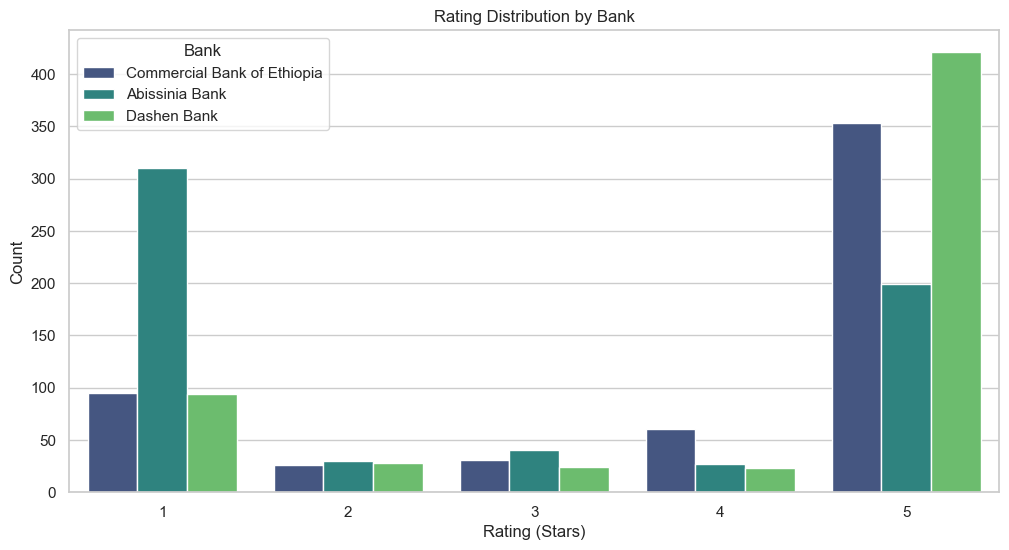

In [3]:
# Rating Distribution by Bank
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', hue='bank', palette='viridis')
plt.title('Rating Distribution by Bank')
plt.xlabel('Rating (Stars)')
plt.ylabel('Count')
plt.legend(title='Bank')
plt.show()

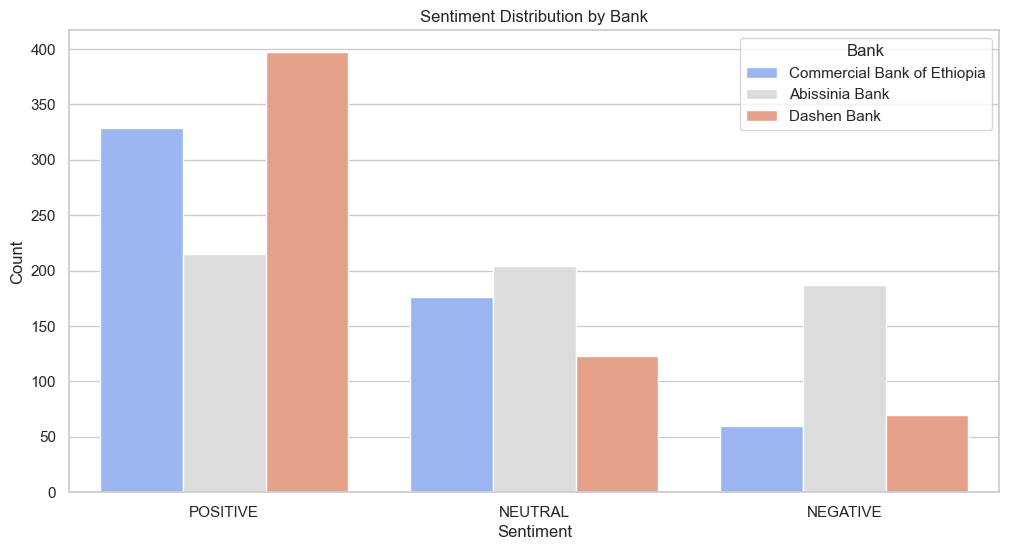

In [4]:
# Sentiment Distribution by Bank
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='sentiment_label', hue='bank', palette='coolwarm', order=['POSITIVE', 'NEUTRAL', 'NEGATIVE'])
plt.title('Sentiment Distribution by Bank')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Bank')
plt.show()

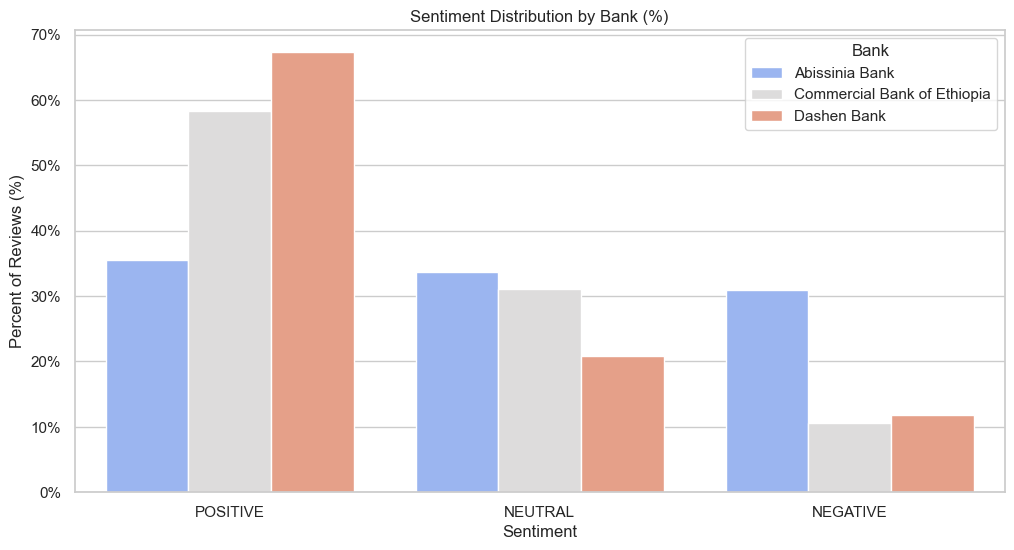

In [8]:
sentiment_by_bank = (
    df.groupby(['bank', 'sentiment_label'])
      .size()
      .reset_index(name='count')
)
sentiment_by_bank['percent'] = (
    sentiment_by_bank.groupby('bank')['count']
    .transform(lambda x: 100 * x / x.sum())
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=sentiment_by_bank,
    x='sentiment_label',
    y='percent',
    hue='bank',
    palette='coolwarm',
    order=['POSITIVE', 'NEUTRAL', 'NEGATIVE']
)
plt.title('Sentiment Distribution by Bank (%)')
plt.xlabel('Sentiment')
plt.ylabel('Percent of Reviews (%)')
plt.legend(title='Bank')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
plt.show()

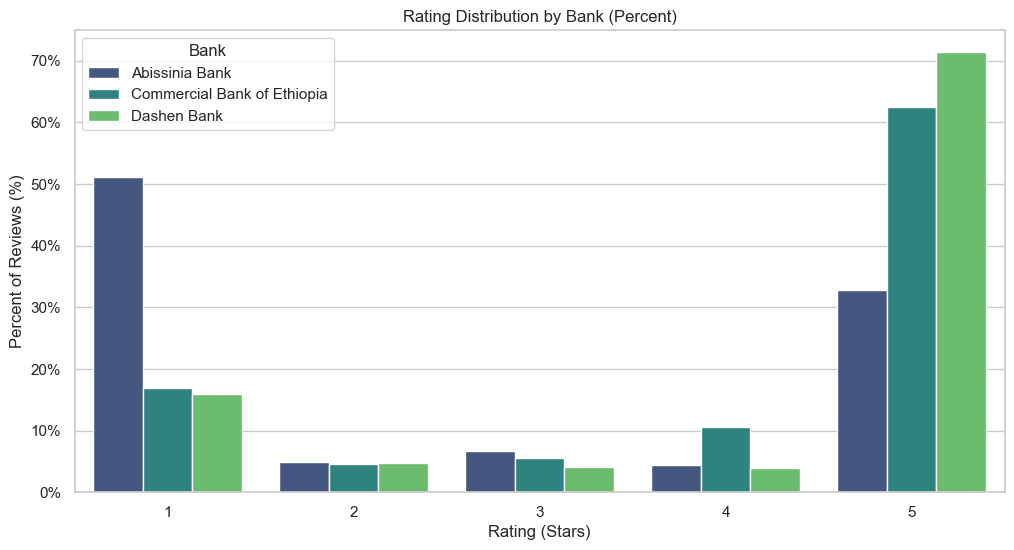

In [5]:
rating_counts = (
    df.groupby(['bank', 'rating'])
      .size()
      .reset_index(name='count')
)
rating_counts['percent'] = (
    rating_counts.groupby('bank')['count']
    .transform(lambda x: 100 * x / x.sum())
)

plt.figure(figsize=(12, 6))
sns.barplot(data=rating_counts, x='rating', y='percent', hue='bank', palette='viridis')
plt.title('Rating Distribution by Bank (Percent)')
plt.xlabel('Rating (Stars)')
plt.ylabel('Percent of Reviews (%)')
plt.legend(title='Bank')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
plt.show()

C:\Users\alexo\AppData\Local\Temp\ipykernel_20488\68758228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_sentiment, x='bank', y='sentiment_score', palette='magma')


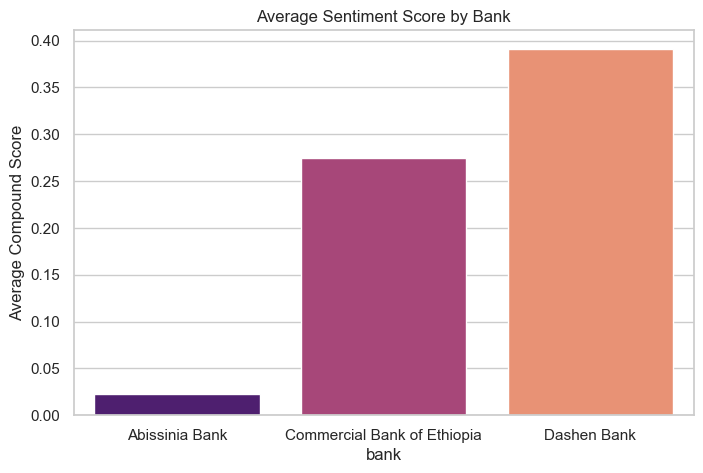

In [6]:
# Average Sentiment Score by Bank
avg_sentiment = df.groupby('bank')['sentiment_score'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_sentiment, x='bank', y='sentiment_score', palette='magma')
plt.title('Average Sentiment Score by Bank')
plt.ylabel('Average Compound Score')
plt.show()

C:\Users\alexo\AppData\Local\Temp\ipykernel_20488\1611806518.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='Blues_d')


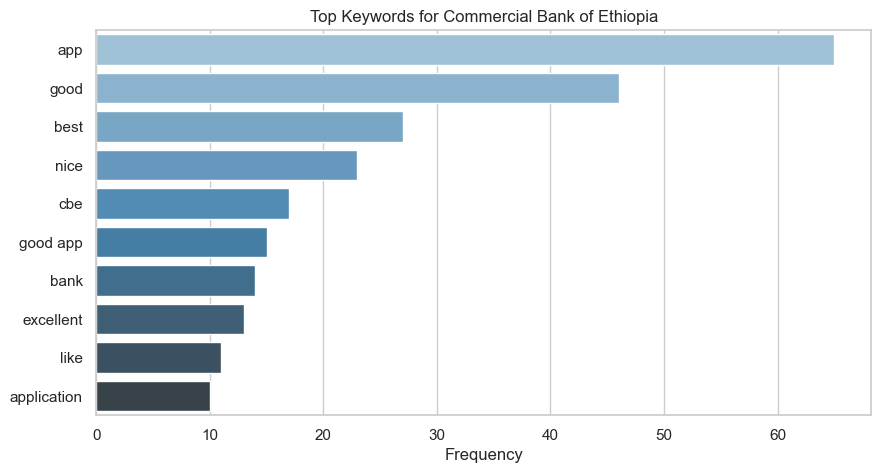

C:\Users\alexo\AppData\Local\Temp\ipykernel_20488\1611806518.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='Blues_d')


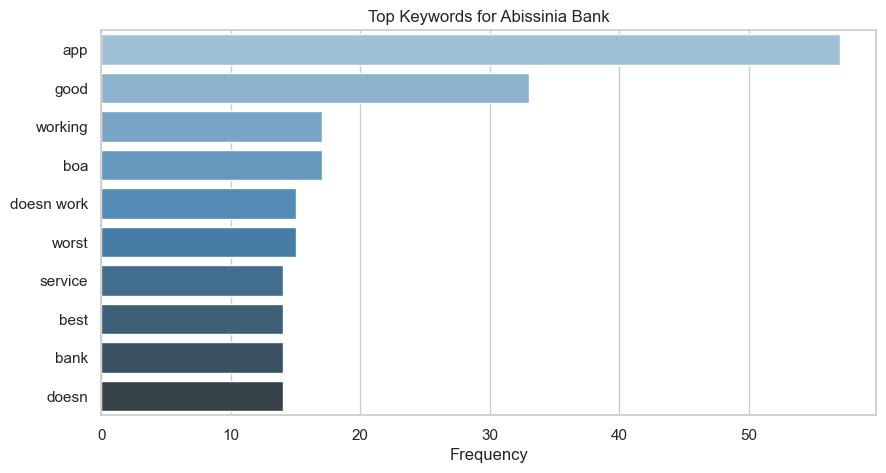

C:\Users\alexo\AppData\Local\Temp\ipykernel_20488\1611806518.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='Blues_d')


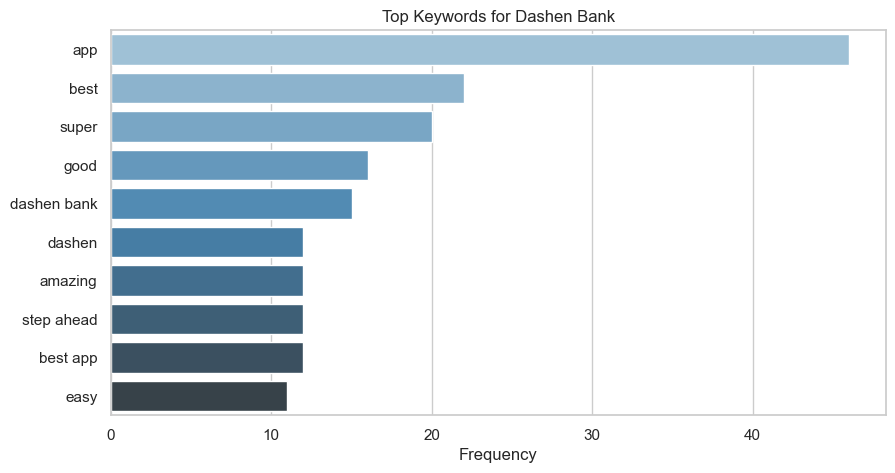

In [7]:
from collections import Counter

# Aggregate keywords per bank
def get_top_keywords(bank_name, top_n=10):
    bank_df = df[df['bank'] == bank_name]
    all_keywords = []
    for k in bank_df['keywords'].dropna():
        if isinstance(k, str):
            all_keywords.extend([x.strip() for x in k.split(',') if x.strip()])
    
    return Counter(all_keywords).most_common(top_n)

banks = df['bank'].unique()
for bank in banks:
    top = get_top_keywords(bank)
    if not top:
        continue
    words, counts = zip(*top)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words), palette='Blues_d')
    plt.title(f'Top Keywords for {bank}')
    plt.xlabel('Frequency')
    plt.show()